# Edge detection
In clesperanto, multiple filters for edge-detection are implemented.

See also
* [Wikipedia](https://en.wikipedia.org/wiki/Edge_detection)

In [31]:
import pyclesperanto_prototype as cle
from skimage.io import imread
import matplotlib.pyplot as plt

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (2 refs)>

In [15]:
blobs = imread("../../data/blobs.tif")
blobs.shape

(254, 256)

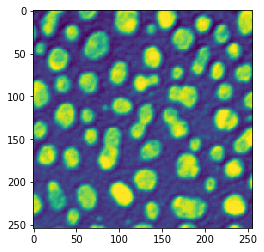

In [16]:
cle.imshow(blobs)

## Sobel operator
[see also](https://en.wikipedia.org/wiki/Sobel_operator)

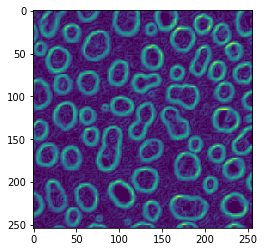

In [20]:
blobs_sobel = cle.sobel(blobs)
cle.imshow(blobs_sobel)


## Laplace operator
[see also](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)

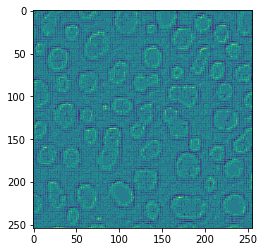

In [22]:
blobs_laplace = cle.laplace_box(blobs)
cle.imshow(blobs_laplace)

## Laplacian of Gaussian
[Also kown as the Mexican hat filter](https://en.wikipedia.org/wiki/Ricker_wavelet)

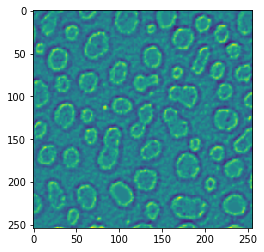

In [24]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=1, sigma_y=1))
cle.imshow(blobs_laplacian_of_gaussian)

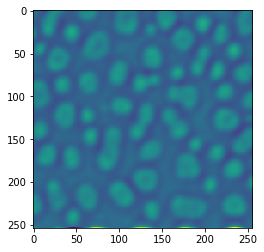

In [25]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=5, sigma_y=5))
cle.imshow(blobs_laplacian_of_gaussian)

## Local Variance filter

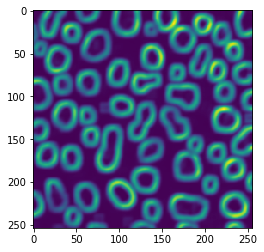

In [19]:
blobs_edges = cle.variance_box(blobs, radius_x=5, radius_y=5)
cle.imshow(blobs_edges)

# Local standard deviation
... is just the square root of the local variance

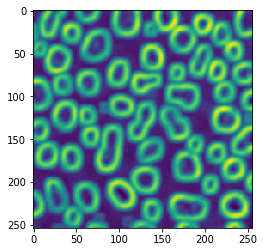

In [27]:
blobs_edges = cle.standard_deviation_box(blobs, radius_x=5, radius_y=5)
cle.imshow(blobs_edges)

## Edge detection is not edge enhancement
Intuitively, one could apply an edge detection filter to enhance edges in images showing edges. Let's try with an image showing membranes. It's a 3D image btw.

In [4]:
image = imread("../../data/EM_C_6_c0.tif")
image.shape

(256, 256, 256)

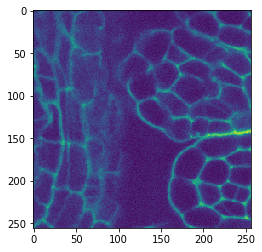

In [8]:
cle.imshow(image[60])

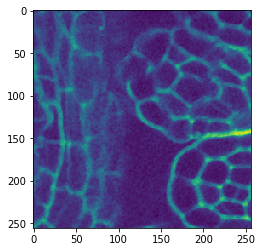

In [29]:
image_sobel = cle.sobel(image)
cle.imshow(image_sobel[60])

When looking very carefully, you may observe that the edges are a bit thicker in the second image. The edge detection filter detects two edges, the increasing signal side of the membrane and the decreasing signal on the opposite side. Let's zoom:

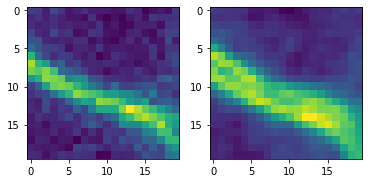

In [37]:
fig, axs = plt.subplots(1, 2)
cle.imshow(                image[60, 125:145, 135:155], plot=axs[0])
cle.imshow(cle.pull(image_sobel)[60, 125:145, 135:155], plot=axs[1])

## Enhancing edges
Thus, to enhance edges in a membrane image, other filters are more useful. Enhancement may for example mean making membranes thicker and potentially closing gaps.

## Local standard deviation

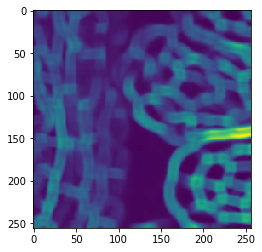

In [39]:
image_std = cle.standard_deviation_box(image, radius_x=5, radius_y=5, radius_z=5)
cle.imshow(image_std[60])

## Local maximum

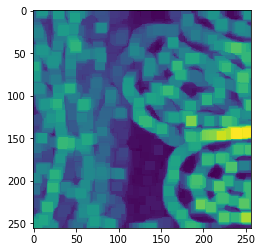

In [40]:
image_max = cle.maximum_box(image, radius_x=5, radius_y=5, radius_z=5)
cle.imshow(image_max[60])